In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
dir(iris) #for a list of all the attributes and methods associated with the object referenced 

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
df = pd.DataFrame(iris.data, columns = iris.feature_names) 
#every columnName takes value from iris.feature_names and data in it comes from iris.data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df['target'] = iris.target # So this is Setosa(0) charachteristics above is about this flower
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
x = df.drop('target', axis = 'columns')
y = df['target']
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [24]:
len(x_train)

120

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
model.score(x_test, y_test)

0.9

In [28]:
model.predict([ [4.7, 3.2, 1.3, 0.2] ]) # which means this is -flower "setosa"

/Users/periyzat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [31]:
model.predict([ [5.9, 3.0, 5.1, 1.8] ]) # which means this is -flower "setosa"

/Users/periyzat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [29]:
y_predicted = model.predict(x_test) # we get the predicted value of our model 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted) 
# compare it with actual value with "confusion_matrix" from sklearn.metrics modul
cm

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  1,  9]])

Text(95.72222222222221, 0.5, 'Truth')

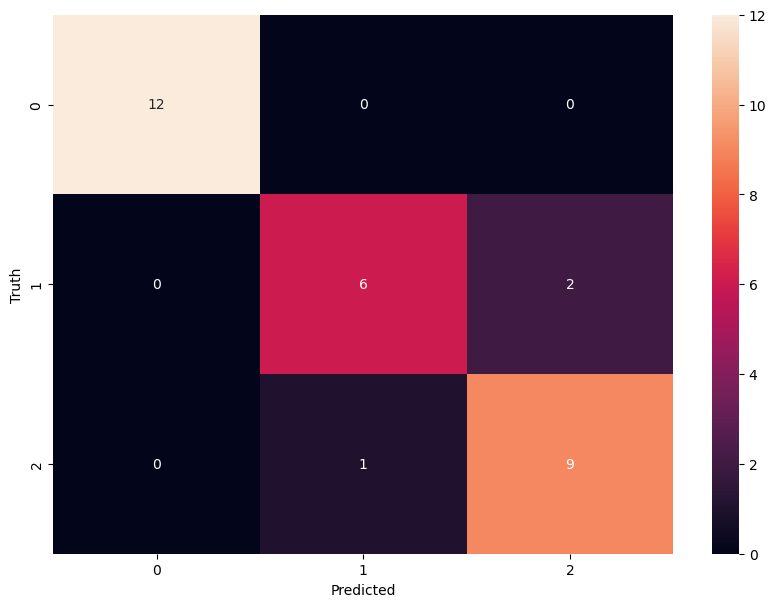

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')